### **Auther**: Shehzad Ahmad
### **Date**: 2024-07-11
### **GitHub**: [ShehzadAhmad-learner](https://github.com/ShehzadAhmad-learner)
### **LinkedIn**: [ds-Shehzad](https://linkedin.com/in/ds-shehzad/)

#### About Dataset
This dataset was taken from Kaggle and was uploaded by [juhibhojani](https://www.kaggle.com/datasets/juhibhojani/house-price)

This dataset is about the pricing of houses in India, the data presented in the dataset included certain columns as 'price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad','guestroom', 'basement', 'hotwaterheating', 'airconditioning','parking', 'prefarea', 'furnishingstatus'.

The House Price dataset provides valuable information about residential properties, encompassing a range of features such as carpet area, property status, floor, transaction type, furnishing, facing, overlooking, society name, bathroom count, balcony count, car parking availability, ownership type, super area, dimensions, plot area, property title, total amount, price per square foot, and a description of the property's location. This dataset offers insights into the dynamics of the housing market and can aid buyers, sellers, and real estate professionals in making informed decisions.

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [81]:
df = pd.read_csv('./Dataset/Housing.csv')

In [82]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [84]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [85]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [86]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

<Axes: xlabel='price', ylabel='area'>

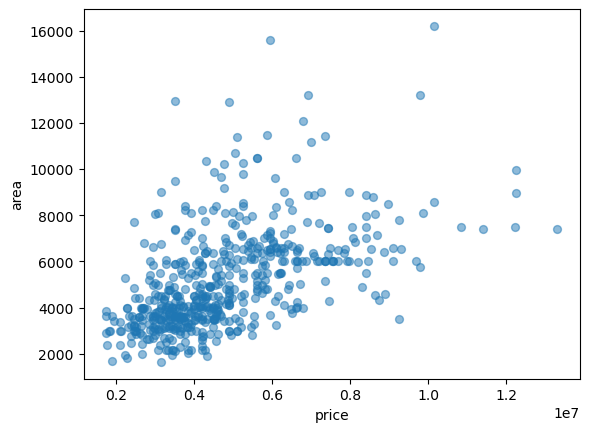

In [87]:
df.plot(kind='scatter',x='price',y='area',s=32,alpha=0.5)

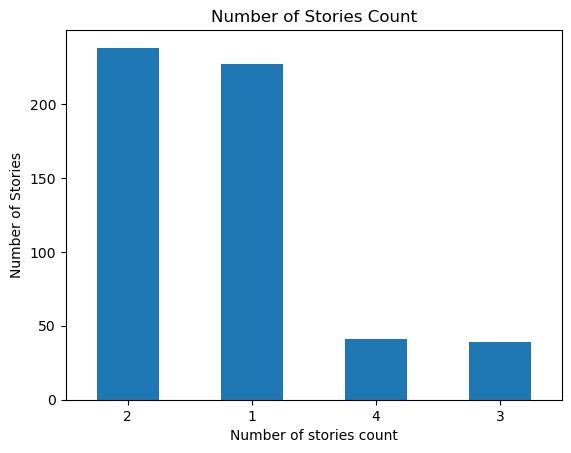

In [88]:
stories_count = df['stories'].value_counts()
stories_count.plot(kind='bar')
plt.title('Number of Stories Count')
plt.xlabel('Number of stories count')
plt.ylabel('Number of Stories')
plt.xticks(rotation=0)
plt.show()

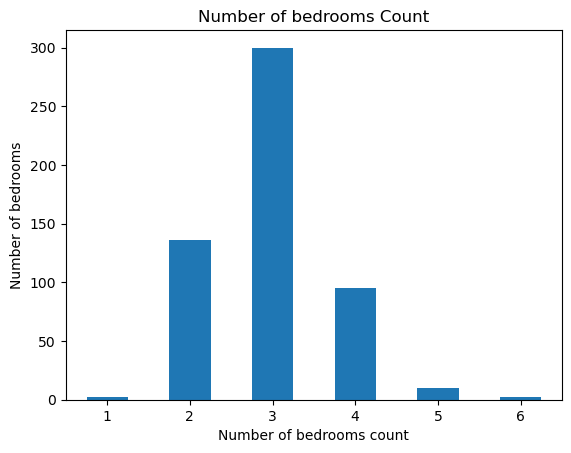

In [89]:
bedroom_count = df['bedrooms'].value_counts()
bedroom_count_sorted = bedroom_count.sort_index()
bedroom_count_sorted.plot(kind='bar')
plt.title('Number of bedrooms Count')
plt.xlabel('Number of bedrooms count')
plt.ylabel('Number of bedrooms')
plt.xticks(rotation=0)
plt.show()

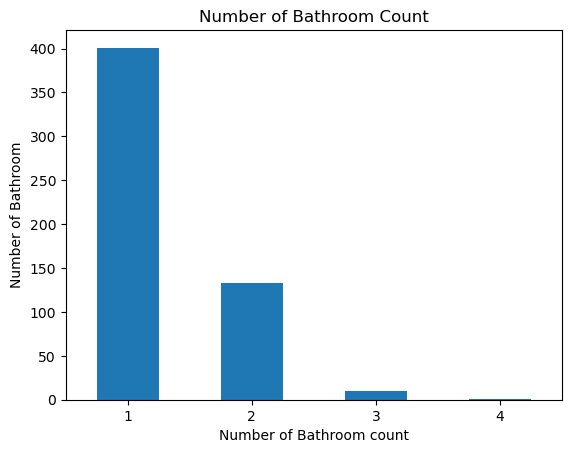

In [90]:
bathroom_count = df['bathrooms'].value_counts()
bathroom_count.plot(kind='bar')
plt.title('Number of Bathroom Count')
plt.xlabel('Number of Bathroom count')
plt.ylabel('Number of Bathroom')
plt.xticks(rotation=0)
plt.show()

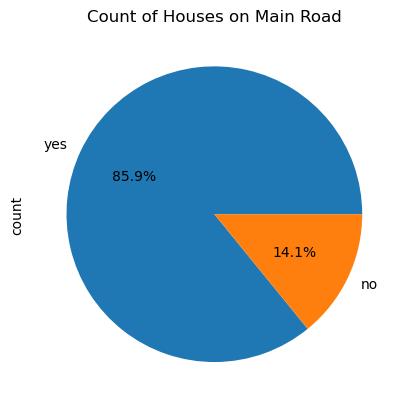

In [91]:
NearMainRoad = df['mainroad'].value_counts()
NearMainRoad.plot(kind='pie',autopct='%1.1f%%')
plt.title('Count of Houses on Main Road')
plt.show()

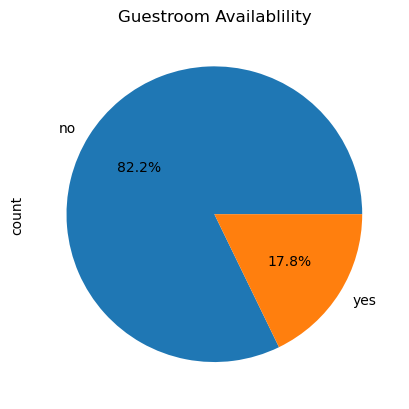

In [92]:
GuestRooms = df['guestroom'].value_counts()
GuestRooms.plot(kind='pie',autopct='%1.1f%%')
plt.title('Guestroom Availablility')
plt.show()

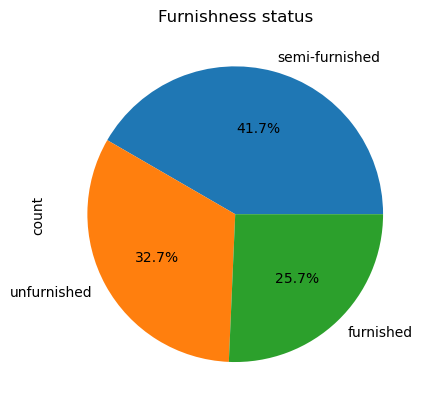

In [93]:
Furnishness = df['furnishingstatus'].value_counts()
Furnishness.plot(kind='pie',autopct='%1.1f%%')
plt.title('Furnishness status')
plt.show()

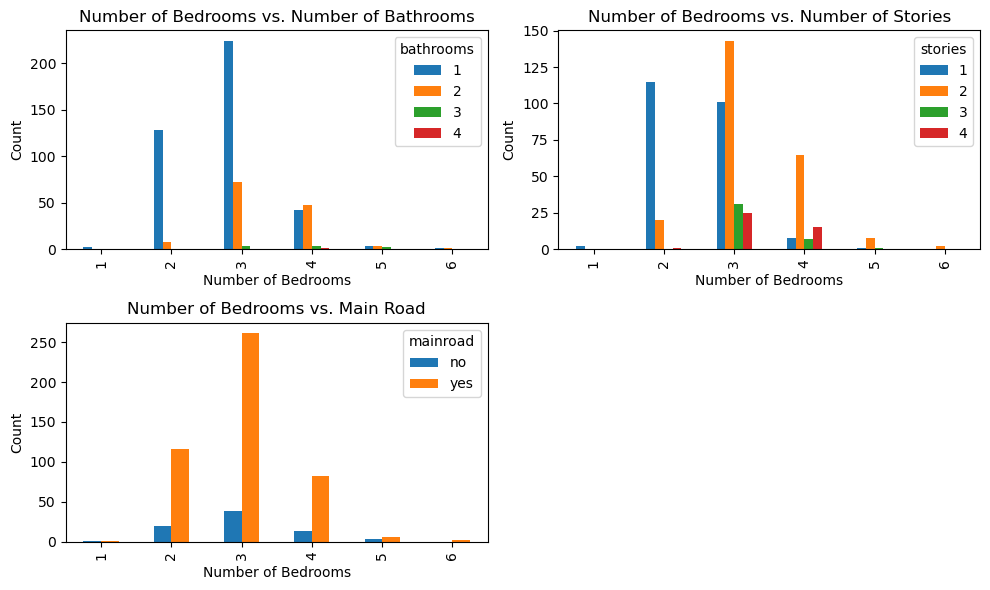

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6))
bedrooms_bathrooms = pd.crosstab(df['bedrooms'], df['bathrooms'])
bedrooms_bathrooms.plot(kind='bar', ax=axes[0, 0])
axes[0, 0].set_title('Number of Bedrooms vs. Number of Bathrooms')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Count')
bedrooms_stories = pd.crosstab(df['bedrooms'], df['stories'])
bedrooms_stories.plot(kind='bar', ax=axes[0, 1])
axes[0, 1].set_title('Number of Bedrooms vs. Number of Stories')
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Count')
bedrooms_mainroad = pd.crosstab(df['bedrooms'], df['mainroad'])
bedrooms_mainroad.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Number of Bedrooms vs. Main Road')
axes[1, 0].set_xlabel('Number of Bedrooms')
axes[1, 0].set_ylabel('Count')
axes[1, 1].axis('off')
plt.tight_layout()
plt.show()


In [95]:
encoder = LabelEncoder()

In [96]:
encoding_col = ['furnishingstatus','prefarea','airconditioning','hotwaterheating','basement','guestroom','mainroad']
for col in encoding_col:
    df[col]=encoder.fit_transform(df[col])

In [97]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


<Axes: >

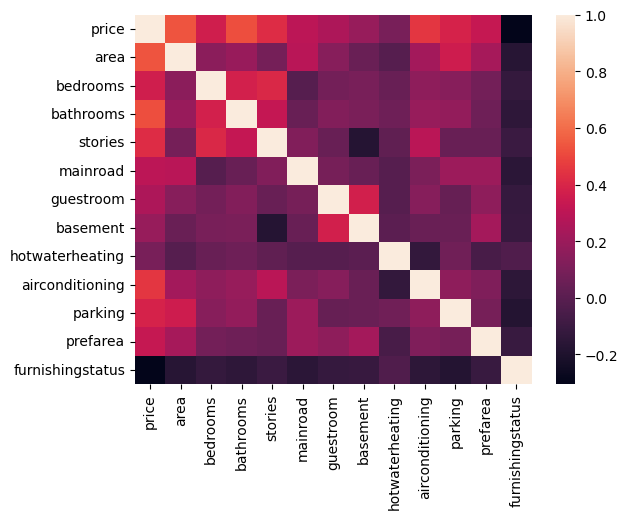

In [98]:
corr = df.corr()
sns.heatmap(corr)

In [99]:
x=df.drop(columns=['price'],axis=1)
y=df['price']

In [100]:
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(y.values.reshape(-1,1))

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
ln = LinearRegression()
ln.fit(x_train,y_train)

LinearRegression()

In [103]:
y_pred = ln.predict(x_test)

In [104]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [105]:
y_pred

array([[0.29902093],
       [0.47679688],
       [0.11366481],
       [0.24325469],
       [0.13705042],
       [0.15697668],
       [0.33726981],
       [0.40380776],
       [0.08708498],
       [0.07956179],
       [0.67710825],
       [0.09328411],
       [0.12516764],
       [0.13872416],
       [0.17003286],
       [0.30745353],
       [0.10717924],
       [0.26500431],
       [0.22796811],
       [0.15368764],
       [0.3503255 ],
       [0.35411261],
       [0.08746447],
       [0.26083032],
       [0.29911305],
       [0.49918119],
       [0.13027547],
       [0.30183242],
       [0.55658209],
       [0.14581525],
       [0.40640014],
       [0.13818223],
       [0.43223591],
       [0.20821964],
       [0.15923398],
       [0.34962129],
       [0.26133075],
       [0.22871723],
       [0.12706987],
       [0.25006031],
       [0.24001388],
       [0.15508953],
       [0.4751633 ],
       [0.19666803],
       [0.16900249],
       [0.22068221],
       [0.42900468],
       [0.194

In [106]:
mse

0.01328124372927074

In [107]:
mae

0.08482075249315933

In [108]:
ln_acc = r2_score(y_test,y_pred)
ln_acc

0.6494754192267793